# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Mario Trianto
- Cita-cita semasa kecil: Pembalap

In [39]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [21]:
# read your data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [22]:
# your code goes here!
df1 = df.groupby('PaymentMethod').agg({'MonthlyCharges': 'mean'}).reset_index()
df1

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


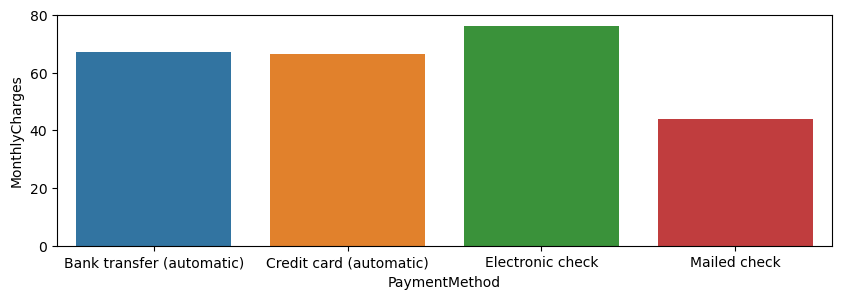

In [23]:
plt.figure(figsize= (10,3))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data = df1)
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:

- Monthly charge terbesar per customer adalah payment method "Electronic Check"
- Monthly charge terkecil per customer adalah payment method "Mailed Check"

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [24]:
# your code goes here!
df['tenure_group'] = df['tenure'].apply(lambda x: 'low_tenure' if x<21 else 'high_tenure' if x >40 else 'medium_tenure')
df2 = df.groupby('tenure_group').agg({'customerID':'count'}).reset_index()
df2

,tenure_group,customerID
0,high_tenure,2757
1,low_tenure,2878
2,medium_tenure,1408


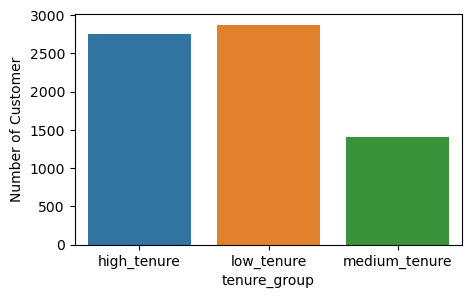

In [25]:
plt.figure(figsize = (5,3))
sns.barplot(x='tenure_group', y='customerID', data=df2)
plt.ylabel('Number of Customer')
plt.show()

Jadi, dari plot di atas, kami menyimpulkan bahwa:

- Grup low_tenure memiliki jumlah customer terbanyak
- Grup medium_tenure memiliki jumlah customer tersedikit

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [26]:
# your code goes here!
df3 = df.groupby(['SeniorCitizen','PhoneService']).agg({'customerID':'count'}).reset_index()
df3

,SeniorCitizen,PhoneService,customerID
0,0,No,578
1,0,Yes,5323
2,1,No,104
3,1,Yes,1038


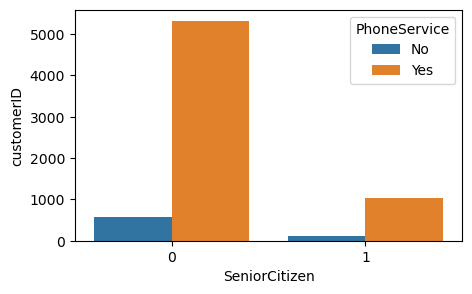

In [27]:
plt.figure(figsize = (5,3))
sns.barplot(x='SeniorCitizen', y='customerID', data=df3, hue = 'PhoneService')
plt.show()

Analisis menggunakan jumlah absolut kurang valid karena perbedaan jumlah senior citizen dan non senior citizen sangat jauh. Lebih valid apabila menggunakan rasio atau persentase

In [28]:
#buat data ratio
senior = 0
nonsenior = 0
ratiolist = []
for index, kolom in df3.iterrows():
    if kolom['SeniorCitizen'] == 1:
        senior += kolom['customerID']
    else:
        nonsenior += kolom['customerID']

for index, kolom in df3.iterrows():
    if kolom['SeniorCitizen'] == 1:
        ratio = round(kolom['customerID']/senior*100,2)
    else:
        ratio = round(kolom['customerID']/nonsenior*100,2)
    
    ratiolist.append(ratio)

df3['Ratio'] = ratiolist
df3

,SeniorCitizen,PhoneService,customerID,Ratio
0,0,No,578,9.79
1,0,Yes,5323,90.21
2,1,No,104,9.11
3,1,Yes,1038,90.89


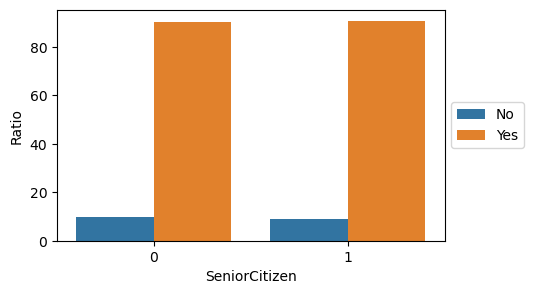

In [29]:
#plot ratio
plt.figure(figsize = (5,3))
sns.barplot(x='SeniorCitizen', y='Ratio', data=df3, hue = 'PhoneService')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
- secara ratio, jumlah pengguna phone service relatif sama antara senior citizen dengan non senior citizen

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [30]:
# your code goes here!
# terdapat data ' ' di "TotalCharges", perlu diubah menjadi '0' agar bisa di ubah menjadi float dan simpan di column baru 'TotalChargesFloat'
df['TotalChargesFloat'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

# ubah tipe data 'TotalChargesFloat' menjadi float
df['TotalChargesFloat'] = df['TotalChargesFloat'].astype(float)
df['TotalChargesFloat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalChargesFloat
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [31]:
print(df['TotalChargesFloat'].describe())
df['TotalChargesFloat'].mode()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalChargesFloat, dtype: float64


0     0.0
1    20.2
Name: TotalChargesFloat, dtype: float64

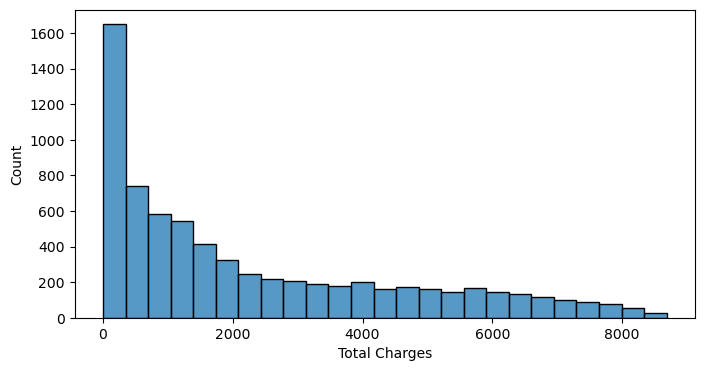

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(x='TotalChargesFloat', data = df)
plt.xlabel('Total Charges')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:
- Bentuk distribusi dari Total Charges adalah positively skewed (mean > median) dengan mean = 2279.7 dan median = 1394.6
- Total charge paling banyak terdapat pada angka 0-20.2

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

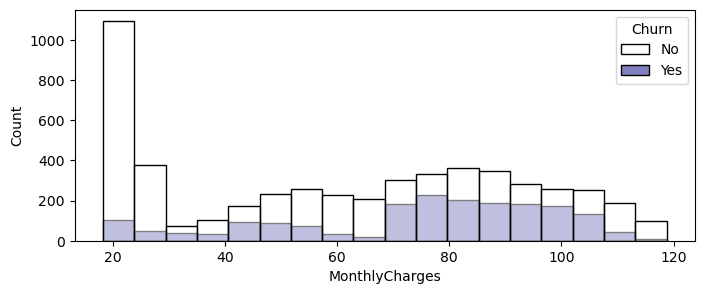

In [33]:
# your code goes here!
plt.figure(figsize=(8,3))
sns.histplot(x='MonthlyCharges', data = df, hue ='Churn', palette=['white', 'navy'])
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa:

- Berdasarkan hasil plot distribusi monthly charges, terlihat bahwa churn rate cukup meningkat pada monthly charges yang tinggi (terutama pada monthly charges >70)

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [34]:
# your code goes here!
df6 = df.groupby(['Partner','Dependents','Churn']).agg({'customerID':'count'}).reset_index()
statuslist = []
for index, kolom in df6.iterrows():
    if kolom['Partner'] == 'No' and kolom['Dependents'] == 'No':
        status = 'No partner & dependents'
    elif kolom['Partner'] == 'No' and kolom['Dependents'] == 'Yes':
        status = 'No partner & have dependents'
    elif kolom['Partner'] == 'Yes' and kolom['Dependents'] == 'No':
        status = 'Have partner & no dependents'
    else:
        status = 'Have partner & dependents'
        
    statuslist.append(status)

    
df6['Status'] = statuslist
df6

,Partner,Dependents,Churn,customerID,Status
0,No,No,No,2157,No partner & dependents
1,No,No,Yes,1123,No partner & dependents
2,No,Yes,No,284,No partner & have dependents
3,No,Yes,Yes,77,No partner & have dependents
4,Yes,No,No,1233,Have partner & no dependents
5,Yes,No,Yes,420,Have partner & no dependents
6,Yes,Yes,No,1500,Have partner & dependents
7,Yes,Yes,Yes,249,Have partner & dependents


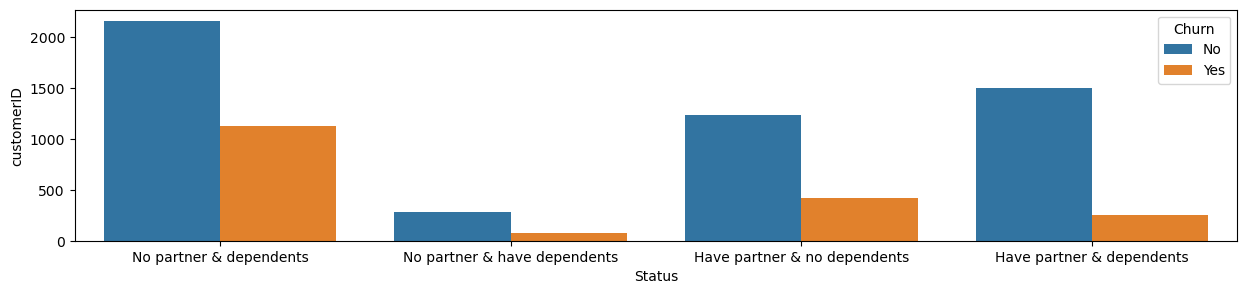

In [35]:
plt.figure(figsize = (15,3))
sns.barplot(x='Status', y='customerID', data=df6, hue = 'Churn')
plt.show()

In [36]:
#buat data ratio
npnd = 0
npd = 0
pnd = 0
pd = 0
ratiolist = []
for index, kolom in df6.iterrows():
    if kolom['Status'] == 'No partner & dependents':
        npnd += kolom['customerID']
    elif kolom['Status'] == 'No partner & have dependents':
        npd += kolom['customerID']
    elif kolom['Status'] == 'Have partner & no dependents':
        pnd += kolom['customerID']
    else:
        pd += kolom['customerID']

for index, kolom in df6.iterrows():
    if kolom['Status'] == 'No partner & dependents':
        ratio = round(kolom['customerID']/npnd*100,2)
    elif kolom['Status'] == 'No partner & have dependents':
        ratio = round(kolom['customerID']/npd*100,2)
    elif kolom['Status'] == 'Have partner & no dependents':
        ratio = round(kolom['customerID']/pnd*100,2)
    else:
        ratio = round(kolom['customerID']/pd*100,2)
    
    ratiolist.append(ratio)

df6['Ratio'] = ratiolist
df6

,Partner,Dependents,Churn,customerID,Status,Ratio
0,No,No,No,2157,No partner & dependents,65.76
1,No,No,Yes,1123,No partner & dependents,34.24
2,No,Yes,No,284,No partner & have dependents,78.67
3,No,Yes,Yes,77,No partner & have dependents,21.33
4,Yes,No,No,1233,Have partner & no dependents,74.59
5,Yes,No,Yes,420,Have partner & no dependents,25.41
6,Yes,Yes,No,1500,Have partner & dependents,85.76
7,Yes,Yes,Yes,249,Have partner & dependents,14.24


<Figure size 800x400 with 0 Axes>

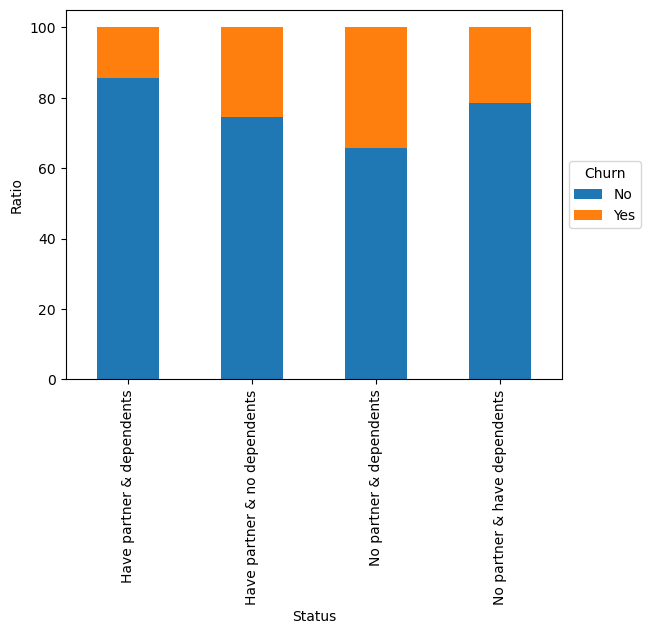

In [41]:
dfpivot = pd.pivot_table(df6[['Status','Churn','Ratio']],index = 'Status', columns = 'Churn', values = 'Ratio')

plt.figure(figsize=(8,4))
dfpivot.plot(kind = 'bar', stacked = True)
plt.ylabel('Ratio')
plt.legend(loc='center left', title='Churn', bbox_to_anchor=(1, 0.5))
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa
- Status customer mempengaruhi churn rate
- Churn rate terkecil pada customer yang memiliki partner dan dependents
- Churn rate terbesar pada customer yang tidak memiliki partner dan dependents

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [80]:
# Buat kolom status
df7 = df[['customerID','SeniorCitizen','Partner','Dependents','Contract','tenure','MonthlyCharges','PaymentMethod','Churn']]

status_list = []
for index, kolom in df7.iterrows():
    if kolom['SeniorCitizen'] == 1 or kolom['Partner'] == 'Yes' or kolom['Dependents'] == 'Yes':
        status = 'Married'
    else:
        status = 'Single'
    
    status_list.append(status)

df7['Status'] = status_list

In [81]:
# Buat kolom tenure_group
df7['tenure_group'] = df7['tenure'].apply(lambda x: 'low_tenure' if x<21 else 'high_tenure' if x >40 else 'medium_tenure')
df7.head()

,customerID,SeniorCitizen,Partner,Dependents,Contract,tenure,MonthlyCharges,PaymentMethod,Churn,Status,tenure_group
0,7590-VHVEG,0,Yes,No,Month-to-month,1,29.85,Electronic check,No,Married,low_tenure
1,5575-GNVDE,0,No,No,One year,34,56.95,Mailed check,No,Single,medium_tenure
2,3668-QPYBK,0,No,No,Month-to-month,2,53.85,Mailed check,Yes,Single,low_tenure
3,7795-CFOCW,0,No,No,One year,45,42.30,Bank transfer (automatic),No,Single,high_tenure
4,9237-HQITU,0,No,No,Month-to-month,2,70.70,Electronic check,Yes,Single,low_tenure


### 7.1 Melihat churn rate pada masing-masing tenure group (bar plot rasio)

<Figure size 800x400 with 0 Axes>

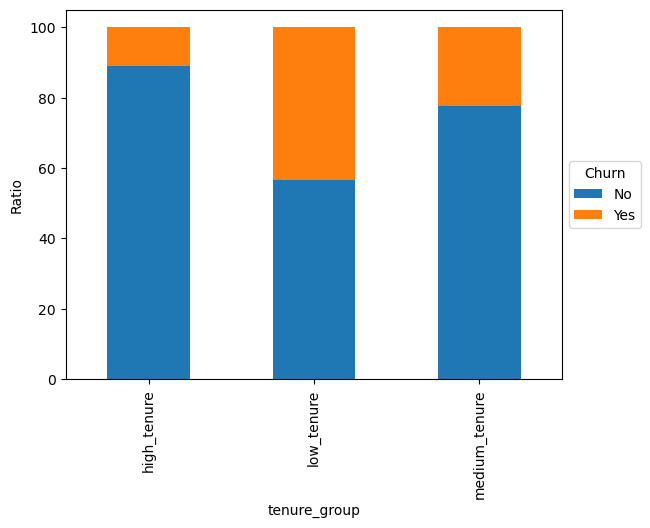

In [82]:
df_tenure = df7.groupby(['tenure_group','Churn']).agg({'customerID':'count'}).reset_index()
df_tenure_total = df7.groupby(['tenure_group']).agg({'customerID':'count'}).reset_index().rename(columns={'customerID': 'Total'})
df_tenure_all = df_tenure.merge(df_tenure_total, on = 'tenure_group')
df_tenure_all['Ratio'] = round(df_tenure_all['customerID']/df_tenure_all['Total']*100,2)

dfpivot = pd.pivot_table(df_tenure_all[['tenure_group','Churn','Ratio']],index = 'tenure_group', columns = 'Churn', values = 'Ratio')

plt.figure(figsize=(8,4))
dfpivot.plot(kind = 'bar', stacked = True)
plt.ylabel('Ratio')
plt.legend(loc='center left', title='Churn', bbox_to_anchor=(1, 0.5))
plt.show()

##### Dari grafik di atas, dapat dilihat bahwa semakin tinggi tenure nya, churn rate cenderung semakin rendah.
##### Kemungkinan ini disebabkan karena banyak orang yang ingin mencoba-coba saja pada masa-masa awal berlangganan dan merasa tidak puas dengan layanan Telco sehingga pindah ke layanan lain. 
##### Lalu untuk orang-orang yang merasa puas dengan layanan PT Telco, mereka kebanyakan sudah nyaman dengan layanan yang diberikan sehingga meneruskan langganan mereka lebih lama dan jarang yang churn

### 7.2 Melihat pengaruh jenis contract terhadap churn rate (bar plot rasio)

<Figure size 800x400 with 0 Axes>

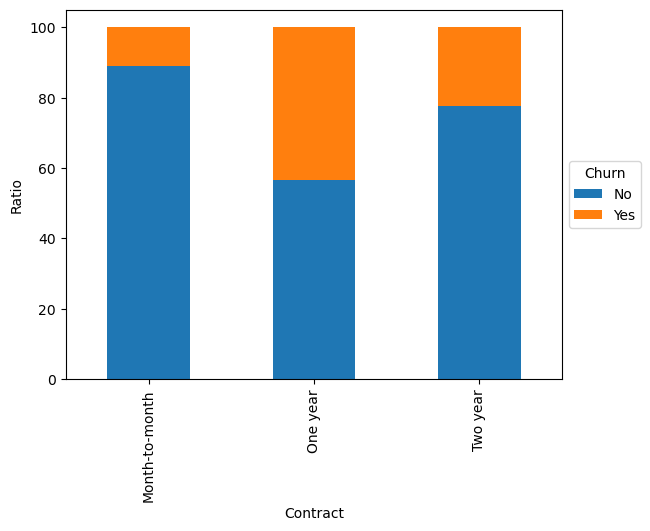

In [83]:
df_contract = df7.groupby(['Contract','Churn']).agg({'customerID':'count'}).reset_index()
df_contract_total = df7.groupby(['Contract']).agg({'customerID':'count'}).reset_index().rename(columns={'customerID': 'Total'})
df_contract_all = df_contract.merge(df_contract_total, on = 'Contract')
df_contract_all['Ratio'] = round(df_tenure_all['customerID']/df_tenure_all['Total']*100,2)

dfpivot = pd.pivot_table(df_contract_all[['Contract','Churn','Ratio']],index = 'Contract', columns = 'Churn', values = 'Ratio')

plt.figure(figsize=(8,4))
dfpivot.plot(kind = 'bar', stacked = True)
plt.ylabel('Ratio')
plt.legend(loc='center left', title='Churn', bbox_to_anchor=(1, 0.5))
plt.show()

##### Dari grafik di atas, terlihat bahwa churn rate tertinggi ada pada contract 1 year dan terendah ada pada contract month to month

### 7.3 Melihat pengaruh status terhadap churn rate (bar plot rasio)

<Figure size 800x400 with 0 Axes>

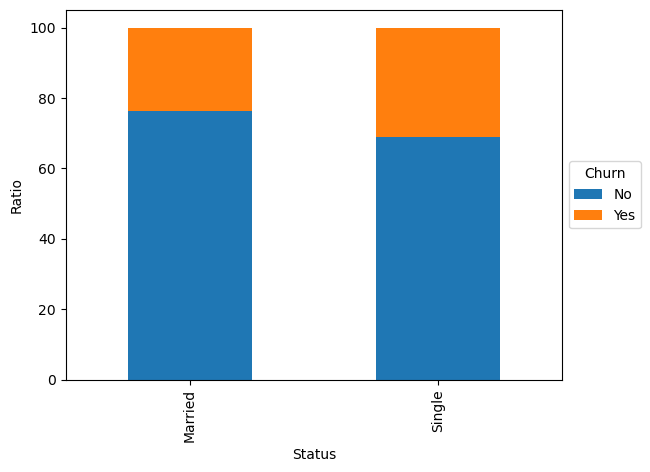

In [84]:
df_status = df7.groupby(['Status','Churn']).agg({'customerID':'count'}).reset_index()
df_status_total = df7.groupby(['Status']).agg({'customerID':'count'}).reset_index().rename(columns={'customerID': 'Total'})
df_status_all = df_status.merge(df_status_total, on = 'Status')
df_status_all['Ratio'] = round(df_status_all['customerID']/df_status_all['Total']*100,2)

dfpivot = pd.pivot_table(df_status_all[['Status','Churn','Ratio']],index = 'Status', columns = 'Churn', values = 'Ratio')

plt.figure(figsize=(8,4))
dfpivot.plot(kind = 'bar', stacked = True)
plt.ylabel('Ratio')
plt.legend(loc='center left', title='Churn', bbox_to_anchor=(1, 0.5))
plt.show()

##### Dari grafik di atas, terlihat bahwa status single memiliki churn rate sedikit lebih besar dari married namun tidak signifikan.
##### Hipotesis: single lebih flexible untuk berpindah-pindah provider layanan, sedangkan yang sudah married lebih banyak pertimbangan terutama karena kebutuhan keluarga (misalkan layanan TV PT Telco channel-channelnya lebih child friendly sehingga baik untuk anak walau harganya lebih mahal dibanding kompetitor)

### 7.4 Melihat pengaruh monthly charges terhadap churn rate (histogram)

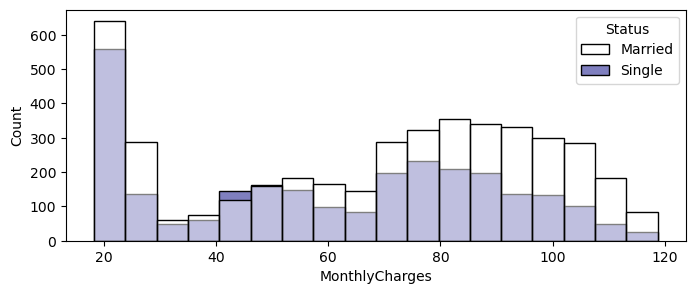

In [85]:
plt.figure(figsize=(8,3))
sns.histplot(x='MonthlyCharges', data = df7, hue ='Status', palette=['white', 'navy'])
plt.show()

##### Dari histogram di atas, orang yang sudah married cenderung lebih mahal monthly charges nya. 
##### Hal ini bisa disebabkan karena kebutuhan layanan untuk yang married lebih banyak dibandingkan single sehingga biaya layanan per bulan lebih tinggi

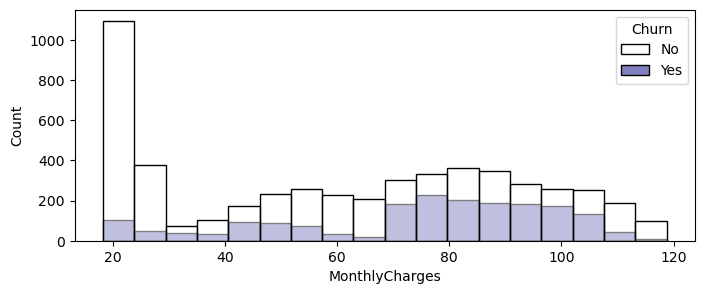

In [86]:
plt.figure(figsize=(8,3))
sns.histplot(x='MonthlyCharges', data = df7, hue ='Churn', palette=['white', 'navy'])
plt.show()

##### Berdasarkan hasil plot distribusi monthly charges, terlihat bahwa churn rate mulai meningkat pada monthly charges yang tinggi (terutama pada monthly charges > $70)

### 7.5 Melihat hubungan payment method dengan churn rate (bar plot rasio)

<Figure size 800x400 with 0 Axes>

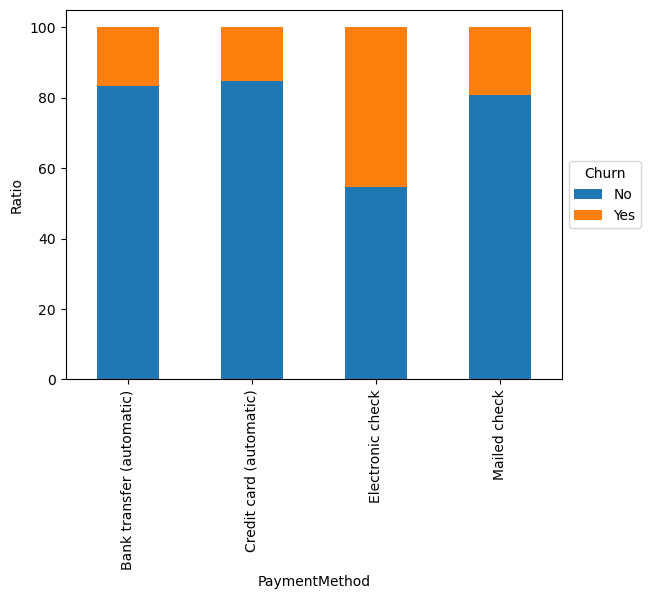

In [88]:
df_payment = df7.groupby(['PaymentMethod','Churn']).agg({'customerID':'count'}).reset_index()
df_payment_total = df7.groupby(['PaymentMethod']).agg({'customerID':'count'}).reset_index().rename(columns={'customerID': 'Total'})
df_payment_all = df_payment.merge(df_payment_total, on = 'PaymentMethod')
df_payment_all['Ratio'] = round(df_payment_all['customerID']/df_payment_all['Total']*100,2)

dfpivot = pd.pivot_table(df_payment_all[['PaymentMethod','Churn','Ratio']],index = 'PaymentMethod', columns = 'Churn', values = 'Ratio')

plt.figure(figsize=(8,4))
dfpivot.plot(kind = 'bar', stacked = True)
plt.ylabel('Ratio')
plt.legend(loc='center left', title='Churn', bbox_to_anchor=(1, 0.5))
plt.show()

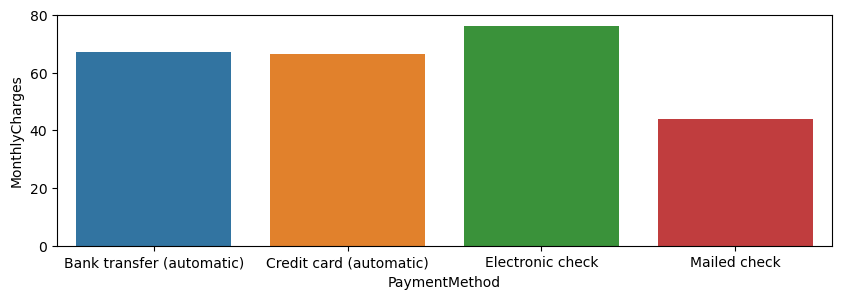

In [89]:
df1 = df.groupby('PaymentMethod').agg({'MonthlyCharges': 'mean'}).reset_index()
plt.figure(figsize= (10,3))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data = df1)
plt.show()

##### Dari 2 grafik di atas, terlihat bahwa churn rate & rata-rata monthly charge tertinggi ada pada customer yang membayar menggunakan Electronic Check (e-check)
##### Churn rate tertinggi pada e-check dikarenakan monthly charges yang dibayarkan juga tertinggi. Hal ini in line dengan histogram pada poin 7.4 dimana churn rate mulai meningkat pada monthly charge >$70
##### Selain itu berdasarkan highradius.com, salah satu kendala terbesar dari pembayaran e-check adalah delay dan error. Hal ini bisa menjadi salah satu alasan yang membuat customer churn.

### Kesimpulan Insight

#### - Semakin lama customer berlangganan, semakin kecil pula churn ratenya. Customer yang baru berlangganan (<21 bulan) punya kecenderungan paling besar untuk churn karena masih mencoba-coba dan membanding-bandingkan dengan provider lain. Pada periode ini ada baiknya memberikan promo-promo menarik agar dapat menahan customer (tidak churn).
#### - Orang yang sudah married membutuhkan jenis layanan yang lebih banyak dan lebih banyak pertimbangan untuk pindah provider dibandingkan dengan single sehingga biaya per bulannya lebih mahal dan juga churn rate nya lebih rendah
#### - Churn rate cenderung meningkat apabila monthly charges >$70
#### - Churn rate cukup tinggi untuk customer yang membayar menggunakan e-check karena monthly charge yang dibayarkan juga memiliki rata-rata tertinggi. Selain itu mungkin sistem pembayaran e-check bisa ditinjau kembali apakah sering terjadi delay/error atau tidak agar bisa meningkatkan kenyamanan pelanggan